# Applied Data Exploration

Now that we have a better foundation in data analysis, we can delve even further in analyis. 

## Data Preparation

We will start by first preparing the data like we have done in the previous modules.

          Date  Temperature  Sales BreakDown Area  QuotaMet
0   02/08/2021         40.0   72.0        No   A1      True
1   03/08/2021         35.0   68.0        No   A2     False
2   04/08/2021         35.0   68.0        No   A2     False
3   05/08/2021         32.0   64.0        No   A3     False
4   06/08/2021         31.0   64.0        No   A1     False
5   07/08/2021         30.0   62.0        No   A1     False
6   08/08/2021         29.0   62.0        No   A1     False
7   09/08/2021         28.0   60.0       Yes   A3     False
8   10/08/2021         30.0   64.0        No   A2     False
9   11/08/2021         33.0   66.0        No   A2     False
10  12/08/2021         33.0   66.0        No   A2     False
11  13/08/2021         33.0   66.0        No   A2     False
12  14/08/2021         33.0   66.0        No   A3     False
13  15/08/2021         36.0   68.0        No   A2     False
14  16/08/2021         38.0   70.0        No   A3      True
15  17/08/2021         40.0   72.0      

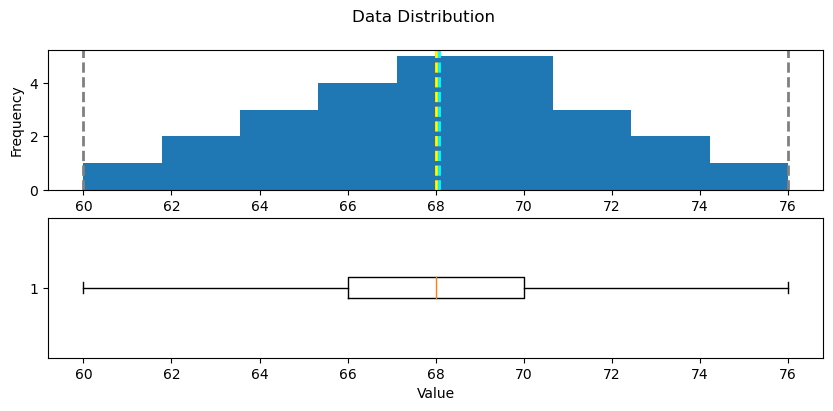

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

df_sales = pd.read_csv('icecream2.csv',delimiter=',',header='infer')

# Remove any rows with missing data
df_sales = df_sales.dropna(axis=0, how='any')

# Calculate if the quota was met, by checking that the sales amount to 70 or more.
quota  = pd.Series(df_sales['Sales'] >= 70)

# Save the quota flag to the data frame
df_sales = pd.concat([df_sales, quota.rename("QuotaMet")], axis=1)

# Print the result out into this notebook
print(df_sales)


# Create a function that we can re-use
def show_distribution(var_data):
 
     # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data, bins = 9)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
  
    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')


show_distribution(df_sales['Sales'])

## Outliers 

Let's look at the temperature distribution.

Minimum:28.00
Mean:36.08
Median:35.50
Mode:33.00
Maximum:55.00



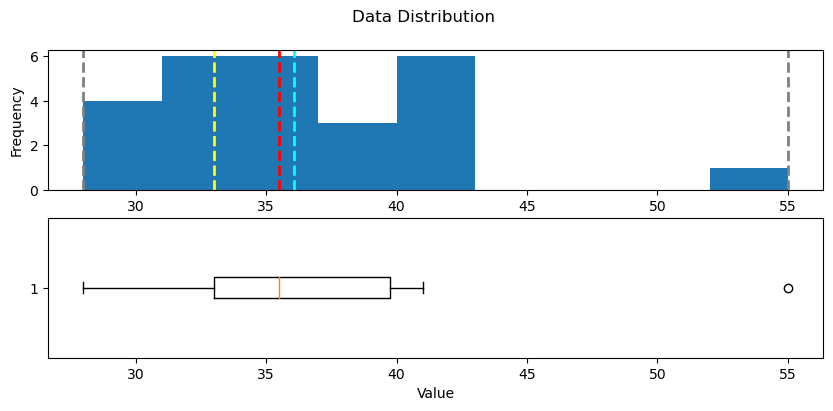

This is different from the distribution of the sales.

The whiskers start from 28, showing that the majority of the data starts above this value. The maximum is marked with a circle, meaning there is an outlier (vastly different from the rest of the data).

Outliers occur for different reasons. Maybe the temperature was incorrectly entered, or it was a natural occurrence and the temperature really registered at 55 degrees.

Minimum:28.00
Mean:35.32
Median:35.00
Mode:33.00
Maximum:41.00



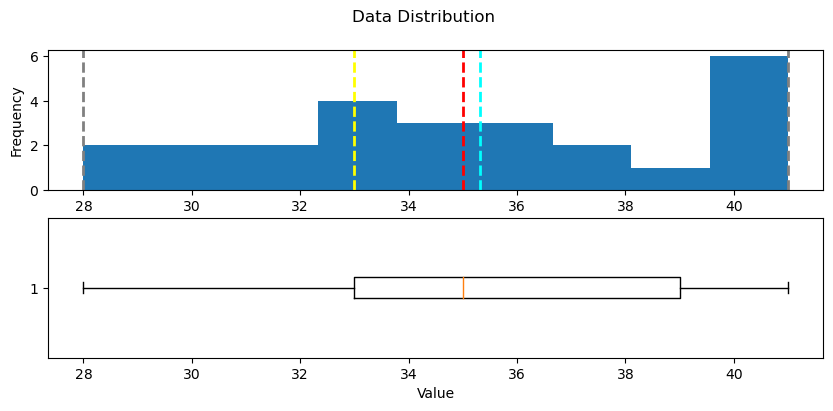

We have excluded the value of 55 since we have considered it to be an outlier. But, when analysing real data one has to have valid justifications for removing outliers. In this case of few entries, we do not know if the temperature was really 55, or it was a mistake. If we had more data we could compare it to other days were the temperature might have reached that point.

If we had more data we can remove outliers by using quantiles. We can say exclude any data that does not fall within the 99% of the rest. If we want to exclude from the minimum we set the parameter as 0.01, if we want to exclude from the maximum we the parameter as 0.99.

Minimum:28.00
Mean:35.32
Median:35.00
Mode:33.00
Maximum:41.00



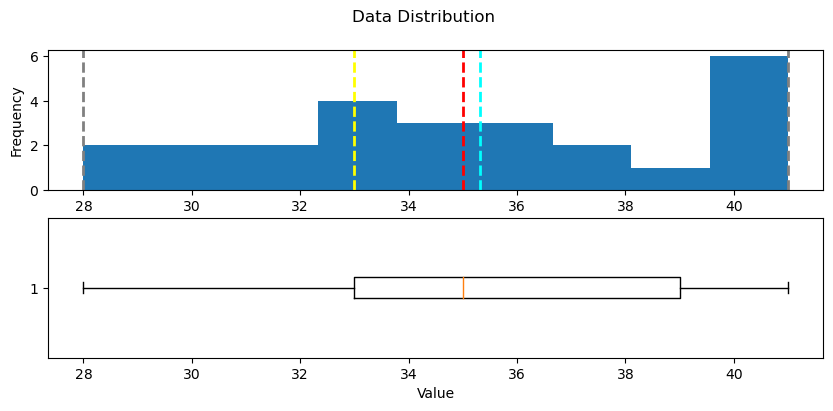

Although the outlier has been removed, the data is not symmetric this time. Most of the temperature readings register 33 to 39 degrees. The few extreme temperature values pull the mean towards the end.

Let's check the tendency.

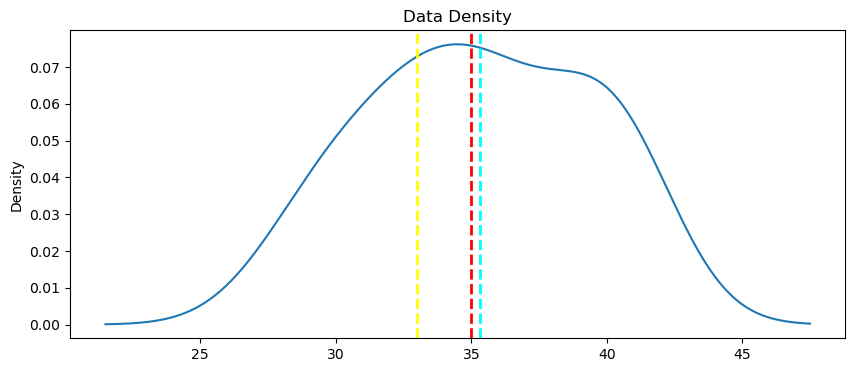

This distribution is now called slightly left-skewed. The mass data on the right creates a long tail on the left because of the extreme high end.

## Measures of variance

Another import aspect to consider is how much variability there is in data. To measure variability we can include:

|Measure|Description|
|-------|-----------|
|Range  | The difference between the minimum value and the maximum value. This can be done by subtracting.
|Variance| The average of the squared difference from the mean. Function `var` can be used. This is done by subtracting each element from the mean. Square the difference and then sum all the squared differences.
|Standard Deviation| This is the square root of the variance. Function `std` can be used.



Sales:
 - Range: 16.00
 - Variance: 16.15
 - Std Dev: 4.02

Temperature:
 - Range: 27.00
 - Variance: 30.63
 - Std Dev: 5.53


Of these values the standard deviation is the generally most useful. It provides a measure of variance in the data. The higher the standard deviation, the more variance there is when comparing values in the distribution to the distribution mean, in other words the data is more spread out.

Basically, it means that if we pick a value at random (say temperature), the picked value can vary +/- 5.53 from the mean in this case.

### How is data distributed in relation to SD

To demonstrate this we can calculate the standard deviation, and the mean of the sales. Then we can represent the sales as a density graph and mark the 1st, 2nd, and 3rd standard deviation.

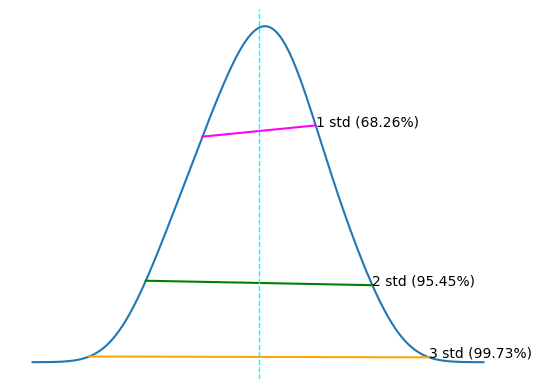

In any normal distribution:
- Approximately 68.26% of values fall within 1sd from the mean
- Approximately 95.45% of values fall within 2sd from the mean
- Approximately 99.73% of values fall within 3sd from the mean

We can also obtain general statistics using the `describe` function.

,Temperature,Sales
count,26.000000,26.000000
mean,36.076923,68.076923
std,5.534785,4.019185
min,28.000000,60.000000
25%,33.000000,66.000000
50%,35.500000,68.000000
75%,39.750000,70.000000
max,55.000000,76.000000


## Comparing Data

Now that we have a clearer understanding of data, it's time to find relationship between the variables.

First of all, lets remove outliers. 

,Date,Temperature,Sales,BreakDown,Area,QuotaMet
0,02/08/2021,40.0,72.0,No,A1,True
1,03/08/2021,35.0,68.0,No,A2,False
2,04/08/2021,35.0,68.0,No,A2,False
3,05/08/2021,32.0,64.0,No,A3,False
4,06/08/2021,31.0,64.0,No,A1,False
5,07/08/2021,30.0,62.0,No,A1,False
6,08/08/2021,29.0,62.0,No,A1,False
7,09/08/2021,28.0,60.0,Yes,A3,False
8,10/08/2021,30.0,64.0,No,A2,False
9,11/08/2021,33.0,66.0,No,A2,False


### Comparing numeric and categorical variables

Temperature and Sales are numeric variables, Quota Met, Breakdown, and Area are categorical variables. Dates are interesting because they can be categorical or numerical depending on their use. For instance if one is trying to predict how population will grow over time, date is numerical (or ordinal), however, if one is trying to find on which day of the week the most babies are born, it can be considered to be categorical. 

Let's compare Temperature to QuotaMet to see if there's a relationship between the two.

<AxesSubplot:title={'center':'Temperature'}, xlabel='QuotaMet'>

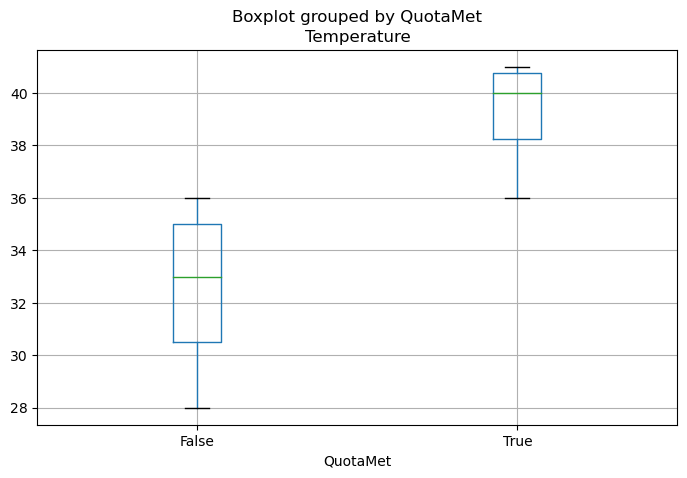

It is quite apparent that the higher the temperature, the more ice-creams were sold, hence the quotas were reached.

### Comparing numeric variables

Let us now compare Sales with Temperature

<AxesSubplot:xlabel='Date'>

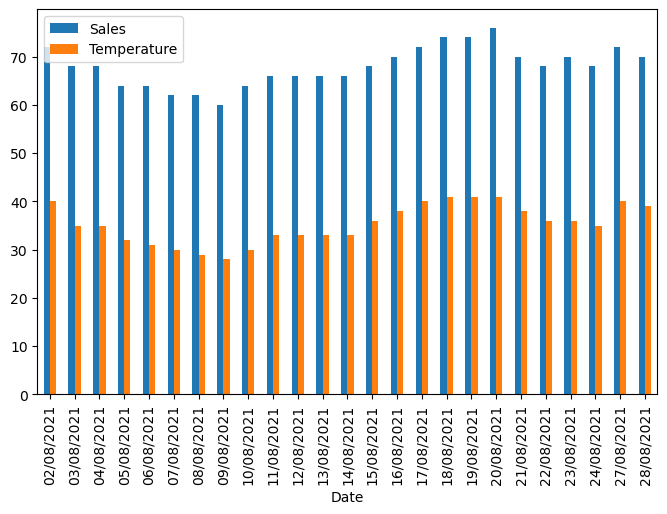

This shows bars for both sales and temperature, but it's not easy to compare, since they have a different scale.

A common technique is to normalise data so that all values are measured on the same scale whilst retaining their original distribution. MinMax scaling is used to convert data on a scale of 0 to 1. We can use an inbuilt scaler in Scikit-Learn.

<AxesSubplot:xlabel='Date'>

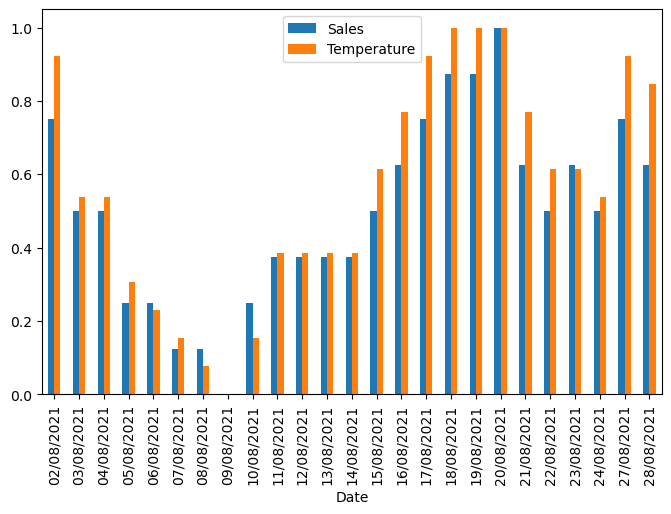

It's easier to see a relationship, it seems that the higher the temperature, the more sales were made. 

It seems there is a correclation between temperature and sales. We can use correlation measurement to check for this.

0.9780531907418398

The correlation statistic is a value between -1 and 1 that indicates the strength of the relationship. 

Values above zero indicate a positive correlation (high values of one variable coincide with high values of another variable), while values below zero indicate a negative correcltion (high values of one variable coincide with low values of another variable). 

One must keep in mind that 'correlation is not causation'.

Another way to visualise the apparent correlation is to use a scatter plot.

<AxesSubplot:title={'center':'Temperature vs Sales'}, xlabel='Temperature', ylabel='Sales'>

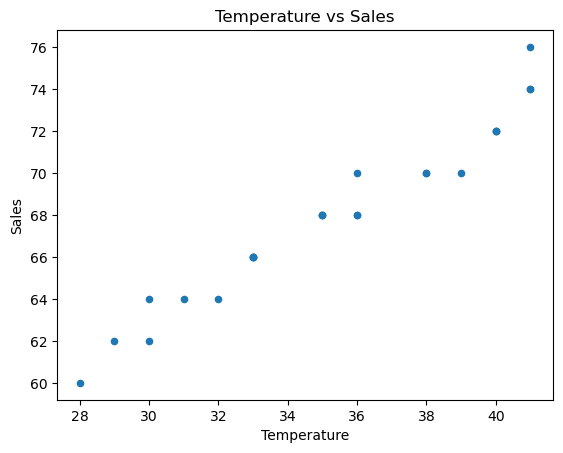

It looks like there is a pattern, where the higher the temperature, the more sales were made.

We can see this more clearly by adding a regression line to show the trend. To do this, we use a statistical technique called least squares regression.

SciPy package provides a linregress that does this work. Amongst other things it returns slope(m) and intercept(b) based on the pair of variable samples you want to compare.

slope: 0.9862
y-intercept: 33.1684
so...
 f(x) = 0.9862x + 33.1684


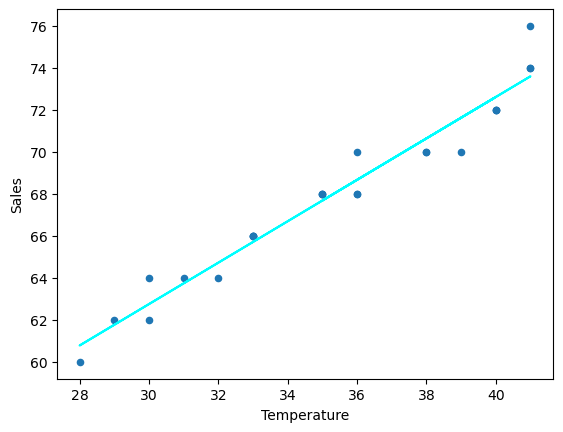

A line of best fit based on the least squares regression coefficients is plotted.

Let's see the values for each day.

,Temperature,Sales,fx,error
0,40.0,72.0,72.615291,0.615291
1,35.0,68.0,67.684425,-0.315575
2,35.0,68.0,67.684425,-0.315575
3,32.0,64.0,64.725905,0.725905
4,31.0,64.0,63.739732,-0.260268
5,30.0,62.0,62.753558,0.753558
6,29.0,62.0,61.767385,-0.232615
7,28.0,60.0,60.781212,0.781212
8,30.0,64.0,62.753558,-1.246442
9,33.0,66.0,65.712078,-0.287922


The errors that are generated are very small, the largest error being for observation 18 with a value of -2.399

#### Using regression coefficients for prediction

We can use the obtained coefficients to predict the sales based on the temperature.

When the temperature is 41 probably we will sell 74


This is the basic premise of machine learning. From sample data that has one or more features, and a label, we have created a function that calculates the label based on the feature values.